In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import os
import string


In [4]:
os.listdir("./")

#print classification report

['.ipynb_checkpoints', 'spam.csv', 'Untitled.ipynb']

In [5]:
def print_validation_report(y_true,y_pred):
    print("Classification Report")
    print(classification_report(y_true,y_pred))
    acc_sc=accuracy_score(y_true,y_pred)
    print("Acuuracy: "+ str(acc_sc))
    return acc_sc

In [6]:
# plot confusion _matrix

def plot_confusion_matrix(y_true,y_pred):
    mtx=confusion_matrix(y_true,y_pred)
    sns.heatmap(mtx,annot=True,fmt='d',linewidth=0.5,cmap="Blues",cbar=False,ax=ax)

In [7]:
# Data Explore

In [8]:
data=pd.read_csv("./spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)


In [10]:
data=data.rename(columns={"v1":"label","v2":"text"})
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.groupby("label").describe()


text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [12]:
#count frequency of words
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
#label -> string to int

data['spam']=data['label'].map({'spam':1,'ham':0}).astype(int)
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
#add feature
data['length']=data['text'].apply(len)

In [15]:
data.head()

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


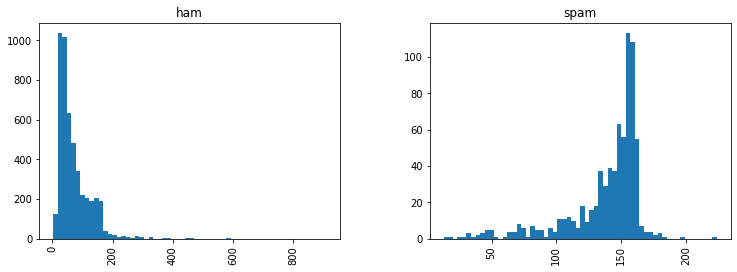

In [16]:
data.hist(column='length',by='label',bins=60,figsize=(12,4));


In [17]:
#spam messages are longer in length

In [18]:
data_ham=data[data['spam']==0].copy()
data_spam=data[data['spam']==1].copy()

In [19]:
def show_wordcloud(data_spam_or_ham,title):
    text=' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords=set(wordcloud.STOPWORDS)
    
    fig_wordcloud=wordcloud.WordCloud(stopwords=stopwords,
                                      background_color='lightgrey',colormap='viridis',width=800,height=600).generate(text)
  
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

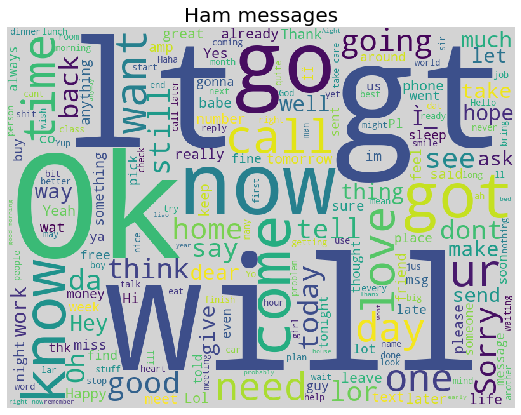

In [20]:
show_wordcloud(data_ham,'Ham messages')

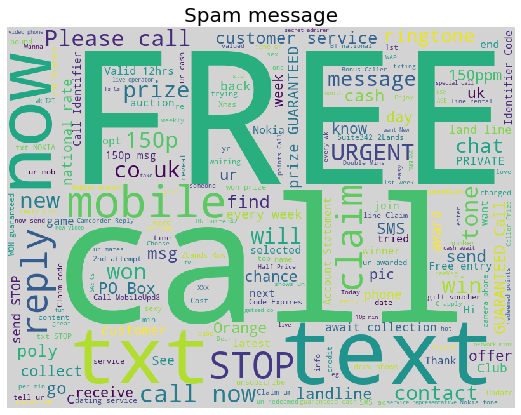

In [21]:
show_wordcloud(data_spam,"Spam message")

In [22]:
#Preprocessing --lowercase,remove punctuation,stopwords,
# -- Tokenization
# -- Vectoriza
# -- TF-IDF weighting

In [23]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#use stopwords of NLTK instead of sklearn because some of the important words are
#removed which are in sklearn wordbank


In [25]:
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [26]:
#remove above words

In [27]:
def remove_punctuation_and_stopwords(sms):
    sms_no_punctuation=[ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation=''.join(sms_no_punctuation).split()
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [28]:
data['text'].apply(remove_punctuation_and_stopwords).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [29]:
## Counting words
from collections import Counter

data_ham.loc[:,'text']=data_ham['text'].apply(remove_punctuation_and_stopwords)
words_data_ham=data_ham['text'].tolist()
data_spam.loc[:,'text']=data_spam['text'].apply(remove_punctuation_and_stopwords)
words_data_spam=data_spam['text'].tolist()

In [30]:
list_ham_words=[]
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [31]:
list_spam_words=[]
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [32]:
c_ham=Counter(list_ham_words)
c_spam=Counter(list_spam_words)

df_ham_words_top30=pd.DataFrame(c_ham.most_common(30),columns=['word','count'])
df_spam_words_top30=pd.DataFrame(c_spam.most_common(30),columns=['word','count'])



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

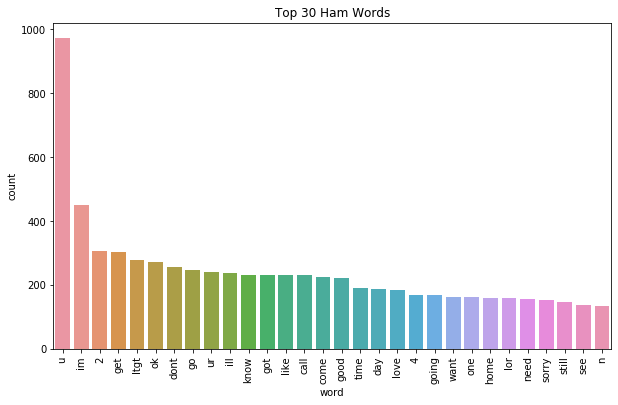

In [33]:
import seaborn as sns

fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='word',y='count',data=df_ham_words_top30,ax=ax)

plt.title("Top 30 Ham Words")
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

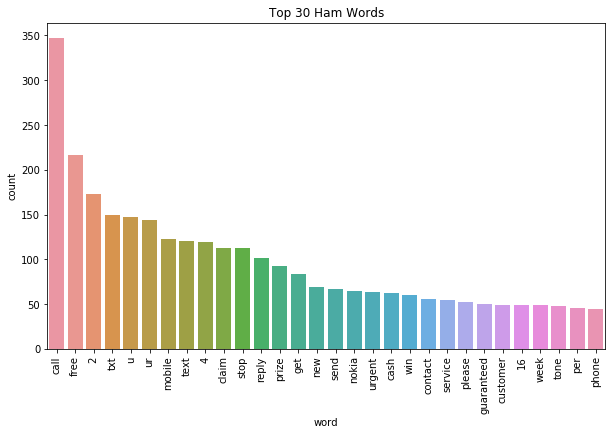

In [34]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='word',y='count',data=df_spam_words_top30,ax=ax)

plt.title("Top 30 Ham Words")
plt.xticks(rotation='vertical')

In [ ]:
# Tokenization
# tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
# Vectorization
# counting the occurrences of tokens in each document.
# TF-IDF
# normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.
# Bag of Words
# In this scheme, features and samples are defined as follows: each individual token occurrence frequency (normalized or not) is treated as a feature.
# the vector of all the token frequencies for a given document is considered a multivariate sample.
# A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
# We call vectorization the general process of turning a collection of text documents into numerical feature vectors.
# This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation.
# Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transform=CountVectorizer(analyzer=remove_punctuation_and_stopwords).fit(data['text'])

In [38]:
len(bow_transform.vocabulary_)

9431

In [39]:
#total distinct word=> 9431


In [52]:
#lets see how bow_vectorizer works

sample=data['text'][787]
bow_sample=bow_transform.transform([sample])
print(sample)
print(bow_sample)

Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
  (0, 298)	1
  (0, 1034)	1
  (0, 1426)	1
  (0, 2293)	1
  (0, 3176)	1
  (0, 3781)	1
  (0, 4602)	1
  (0, 4939)	1
  (0, 5005)	1
  (0, 5470)	1
  (0, 5637)	1
  (0, 6151)	1
  (0, 6216)	1
  (0, 8244)	1
  (0, 8518)	1


In [54]:
bow_data=bow_transform.transform(data['text'])


In [56]:
bow_data.shape

(5572, 9431)

In [58]:
#5572 * 9431 matrix
#non zeros
bow_data.nnz

49772

In [61]:
# 5572*9431 =52549532
#49772/52549532 =0.0009471444959776236

#only 10% of nonzero

# Sparsity
# As most documents will typically use a very small subset of the words used in the corpus,
# the resulting matrix will have many feature values that are zeros (typically more than 99% of them).
# For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary
# with a size in the order of 100,000 unique words in total while each document will use 100 to
# 1000 unique words individually.
# In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector,
# implementations will typically use a sparse representation such as available in the scipy.sparse package.




0.0009471444959776236

In [62]:
#Term frequency inverse document frequency - TFIDF

# Occurrence count is a good start but there is an issue: longer documents will have higher average count values
# than shorter documents, even though they might talk about the same topics.
# To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document
# by the total number of words in the document: these new features are called tf for Term Frequencies.
# Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are
# therefore less informative than those that occur only in a smaller portion of the corpus.
# This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(bow_data)

In [73]:
tfidf_sample=tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 8518)	0.18070059318586376
  (0, 8244)	0.22775723818312849
  (0, 6216)	0.3161191481716074
  (0, 6151)	0.30892933635997893
  (0, 5637)	0.23035827661346842
  (0, 5470)	0.18918346468598746
  (0, 5005)	0.30892933635997893
  (0, 4939)	0.2149709158353342
  (0, 4602)	0.2481822138291908
  (0, 3781)	0.16671159199135727
  (0, 3176)	0.24416843492867374
  (0, 2293)	0.324918766654137
  (0, 1426)	0.1827903423402268
  (0, 1034)	0.2784387575781442
  (0, 298)	0.35225287828427715


In [75]:
data_tfidf=tfidf_transformer.transform(bow_data)

In [77]:
data_tfidf

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [98]:
#train and test for above tfidf matrix only

from sklearn.model_selection import train_test_split

data_tfidf_train,data_tfidf_test,label_train,label_test=train_test_split(data_tfidf,data["spam"],test_size=0.30,random_state=5)                




In [80]:
data_tfidf_train

<4179x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 37629 stored elements in Compressed Sparse Row format>

In [81]:
data_tfidf_test

<1393x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 12143 stored elements in Compressed Sparse Row format>

In [82]:
#for TFIDF matrix and feature "length"

In [99]:
from scipy.sparse import hstack
X2=hstack((data_tfidf,np.array(data['length'])[:,None])).A

In [100]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,data["spam"],test_size=0.30,random_state=5)

In [101]:
#Classifiers

# 1. Naive bayes

#sparse matrix to matrix

data_tfidf_train=data_tfidf_train.A
data_tfidf_test=data_tfidf_test.A





In [102]:
spam_detection_model=MultinomialNB().fit(data_tfidf_train,label_train)
pred_test_MNB=spam_detection_model.predict(data_tfidf_test)
accu_MNB=accuracy_score(label_test,pred_test_MNB)


In [103]:
print(accu_MNB)

0.965311004784689


ValueError: Expected 2D array, got scalar array instead:
array=hello where are you please come home.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.